In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId',
                          columns='movieId',
                          values='rating')

In [3]:
ratings_matrix = ratings_matrix.dropna(thresh=200,
                                       axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100,
                                       axis=1)
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R,
                            axis=1)

In [4]:
R_demeaned = R - user_ratings_mean.reshape(-1,
                                           1)

U, sigma, Vt = svds(R_demeaned,
                    k=3)

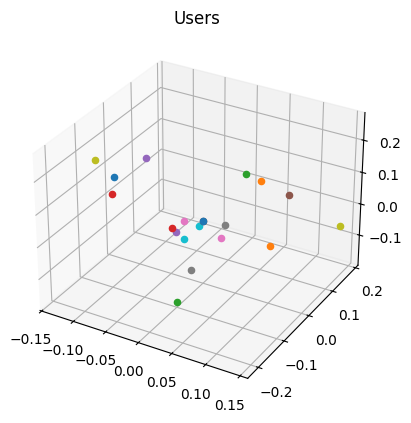

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

num_users_to_plot = 20
for i in range(min(num_users_to_plot, U.shape[0])):
    ax.scatter(U[i, 0], U[i, 1], U[i, 2])

ax.set_title('Users')

plt.show()

In [6]:
print(U)

[[-0.11701519 -0.0486775   0.10423191]
 [ 0.11847179 -0.08575014  0.25393107]
 [ 0.04659884 -0.2114704  -0.06167357]
 [-0.03369839 -0.03431137 -0.01493453]
 [-0.11315672  0.06023676  0.09295234]
 [ 0.          0.          0.        ]
 [-0.00176799 -0.06557723  0.04769789]
 [ 0.0223581   0.03028765 -0.01808238]
 [ 0.14094734  0.18267287 -0.0629276 ]
 [-0.02632272 -0.00939526 -0.06325497]
 [ 0.          0.          0.        ]
 [ 0.0808657   0.0546264  -0.07019834]
 [ 0.05670146  0.0201186   0.16508456]
 [-0.12109341 -0.04722163  0.04750486]
 [-0.02915682 -0.03123462 -0.02748431]
 [ 0.09201204  0.09678061  0.06990315]
 [ 0.01555938  0.02934068 -0.06364908]
 [-0.01879314 -0.00076514 -0.16784247]
 [-0.13257457 -0.07801818  0.16788099]
 [-0.00475961 -0.0016749  -0.01720317]
 [-0.05804253 -0.12877441  0.02109279]
 [ 0.15642742 -0.0874789   0.00269698]
 [-0.05516555  0.1449462   0.06380476]
 [-0.07978081  0.11678833  0.02377067]
 [ 0.05583846  0.06600087 -0.03290081]
 [ 0.04613378 -0.10703474

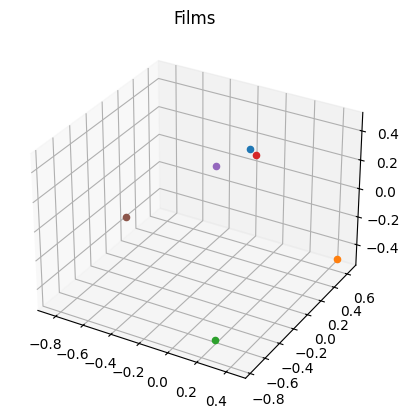

In [16]:
fig = plt.figure()
V = Vt.T
ax2 = fig.add_subplot(111, projection='3d')

num_films_to_plot = 20
for i in range(min(num_films_to_plot, V.shape[0])):
    ax2.scatter(V[i, 0], V[i, 1], V[i, 2])

ax2.set_title('Films')

plt.show()

In [15]:
print(V)

[[ 0.09296504  0.03512916  0.45685515]
 [ 0.43669991  0.63524784 -0.48020396]
 [ 0.2693743  -0.76001901 -0.42360706]
 [ 0.12853428  0.04926365  0.41995691]
 [-0.08870624 -0.06453129  0.33327777]
 [-0.83886728  0.10490964 -0.30627881]]
